In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Pandas Review

This HW covers the concepts simple pandas concepts introduced in class using NBA Players Stats - 2014-2015 data
To find out more about the data follow the link: https://www.kaggle.com/drgilermo/nba-players-stats-20142015/version/1

## Load `players_stats.csv`

In [2]:
df=pd.read_csv("players_stats.csv")

## Explore the data in 3 different ways (using 3 different methods)
Hint: you want to use methods that show the size and shape of your dataframe

In [3]:
#Looking at the first five values
df.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [4]:
#Looking at the last 5 values
df.tail()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
485,Xavier Henry,9,86,20,3,13,23.1,0,0,0.0,...,24.0,be,"March 15, 1991",University of Kansas,4,195.0,SF,LAL,99.00,26.035503
486,Zach LaVine,77,1902,778,286,677,42.2,57,167,34.1,...,20.0,us,"March 10, 1995","University of California, Los Angeles",R,192.5,PG,MIN,85.05,22.951594
487,Zach Randolph,71,2304,1143,454,932,48.7,7,20,35.0,...,34.0,us,"July 16, 1981",Michigan State University,13,202.5,PF,MEM,117.00,28.532236
488,Zaza Pachulia,73,1730,606,240,529,45.4,0,3,0.0,...,31.0,ge,"February 10, 1984",NaN,11,207.5,C,MIL,121.50,28.218900
489,Zoran Dragic,16,75,28,11,30,36.7,3,14,21.4,...,26.0,si,"June 22, 1989",NaN,R,192.5,SG,PHO,90.00,24.287401


In [5]:
#Looking at the columns
df.columns

Index(['Name', 'Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age', 'Birth_Place',
       'Birthdate', 'Collage', 'Experience', 'Height', 'Pos', 'Team', 'Weight',
       'BMI'],
      dtype='object')

In [6]:
#Looking at the number of rows and columns
df.shape

(490, 34)

## Visualize the distribution of weight, height and age
Hint: you might want to use a countplot

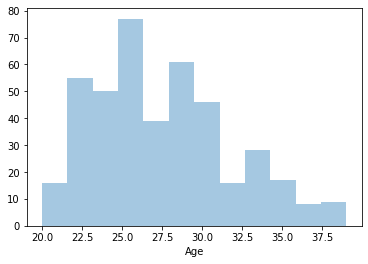

In [7]:
#As these are continuous variables, I am using histograms

sns.distplot(df.Age.dropna(), kde=False)

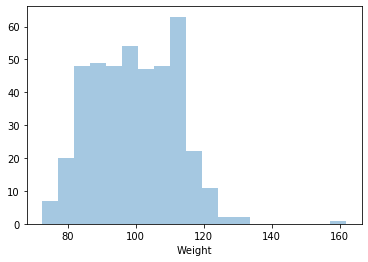

In [8]:
sns.distplot(df.Weight.dropna(), kde=False)

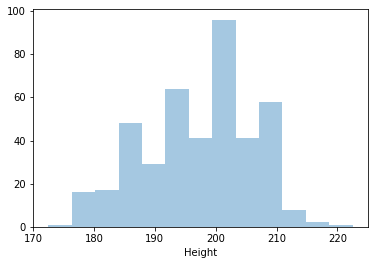

In [9]:
sns.distplot(df.Height.dropna(), kde=False)

## Create a new df that only includes the following columns: `Height`, `Weight`, `Age`, `Birth_Place`

In [10]:
df_select=df.loc[:,["Height", "Weight", "Age", "Birth_Place"]]

## Calculate the mean Height, Weight and Age for each country using the new df

In [11]:
series=[
    df_select.Height.mean(),
    df_select.Weight.mean(),
    df_select.Age.mean()
]

In [12]:
means=pd.DataFrame(series, index=["Height", "Weight", "Age"], columns=["Mean"])

## Separate the `Weight` column into 4 equal size bins: lightweight, middleweight, heavyweight, heaviest

In [13]:
df_select["bins"]=pd.cut(df_select["Weight"],bins=4, labels=["lightweight", "middleweight","heavyweight","heaviest"])

df_select["bins"].value_counts()

middleweight    233
lightweight     166
heavyweight      22
heaviest          1
Name: bins, dtype: int64

## Working with dataframes (append, merge, concentrate, reshape)
Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Step I. Split the data
#### Split the data Horizontally:
 - df1_horiz - select rows 50-100 from the original df
 - df2_horiz - select rows 150-250 from the original df

In [14]:
df1_horiz=df.iloc[50:101]
df2_horiz=df.iloc[150:251]

#### Split the data Vertically:
- df1_vert - select the first 5 columns 
- df2_vert - select the last 10 columns

In [15]:
df1_vert=df.iloc[:,:5]
df2_vert=df.iloc[:,-10:]

df.columns

Index(['Name', 'Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age', 'Birth_Place',
       'Birthdate', 'Collage', 'Experience', 'Height', 'Pos', 'Team', 'Weight',
       'BMI'],
      dtype='object')

#### Select all columns between `Games Played` and `PF` skipping 2 columns in between

In [16]:
df.loc[:,"Games Played":"PF":3]

,Games Played,FGM,3PM,FTM,OREB,AST,TOV
0,26,51,15,16,6,46,14
1,82,344,121,145,32,261,157
2,47,93,13,44,46,33,38
3,32,91,1,30,48,30,44
4,76,519,11,107,131,244,100
5,65,486,2,108,99,113,68
6,74,195,73,82,31,83,60
7,27,121,26,106,19,82,52
8,5,1,0,2,1,1,0
9,69,179,1,73,142,32,74


### Step II. Compbine the data

####  Combine `df1_horiz` and `df2_horiz` horizontally using any method

In [17]:
hor_combine=pd.concat([df1_horiz,df2_horiz])
hor_combine=df1_horiz.append(df2_horiz)

#### Concentrate `df1_vert` and `df2_vert` vertically using any method

In [23]:
ver_combine=df1_vert.join(df2_vert)
ver_combine

,Name,Games Played,MIN,PTS,FGM,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
5,Al Jefferson,65,1992,1082,486,30.0,us,"January 4, 1985",NaN,10,205.0,C,CHA,130.05,30.945866
6,Alan Anderson,74,1744,545,195,33.0,us,"October 16, 1982",Michigan State University,5,195.0,SG,NJN,99.00,26.035503
7,Alec Burks,27,899,374,121,24.0,us,"July 20, 1991",University of Colorado,3,195.0,SG,UTA,96.30,25.325444
8,Alex Kirk,5,14,4,1,24.0,us,"November 14, 1991",University of New Mexico,R,210.0,C,CLE,110.25,25.000000
9,Alex Len,69,1518,432,179,22.0,ua,"June 16, 1993",University of Maryland,1,212.5,C,PHO,117.00,25.910035


### Delete a `3PM` and `Games Played`  from the original df

In [18]:
df.drop(columns=["3PM","Games Played"])

,Name,MIN,PTS,FGM,FGA,FG%,3PA,3P%,FTM,FTA,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,324,133,51,137,37.2,57,26.3,16,24,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,1885,954,344,817,42.1,313,38.7,145,174,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,797,243,93,208,44.7,48,27.1,44,61,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,740,213,91,220,41.4,9,11.1,30,46,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,2318,1156,519,965,53.8,36,30.6,107,141,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
5,Al Jefferson,1992,1082,486,1010,48.1,5,40.0,108,165,...,30.0,us,"January 4, 1985",NaN,10,205.0,C,CHA,130.05,30.945866
6,Alan Anderson,1744,545,195,440,44.3,210,34.8,82,101,...,33.0,us,"October 16, 1982",Michigan State University,5,195.0,SG,NJN,99.00,26.035503
7,Alec Burks,899,374,121,300,40.3,68,38.2,106,129,...,24.0,us,"July 20, 1991",University of Colorado,3,195.0,SG,UTA,96.30,25.325444
8,Alex Kirk,14,4,1,4,25.0,0,0.0,2,2,...,24.0,us,"November 14, 1991",University of New Mexico,R,210.0,C,CLE,110.25,25.000000
9,Alex Len,1518,432,179,353,50.7,3,33.3,73,104,...,22.0,ua,"June 16, 1993",University of Maryland,1,212.5,C,PHO,117.00,25.910035
